<a href="https://colab.research.google.com/github/ikale1234/CSE151NEWS/blob/Milestone4/CSE151_Milestone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone Directory

In [ ]:
!git clone https://github.com/ikale1234/CSE151NEWS.git

Cloning into 'CSE151NEWS'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 110 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 8.38 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (28/28), done.


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_csv('/content/CSE151NEWS/data/news_eval.csv', sep=';')
df

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
...,...,...,...,...
8112,8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
8114,8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
8115,8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


### Data Observation Steps

Feature Information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8117 non-null   int64 
 1   title       8117 non-null   object
 2   text        8117 non-null   object
 3   label       8117 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 253.8+ KB


Counting Null Values:

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


Analyzing Data Entry Size and Label Information:

In [ ]:
df.describe()

,Unnamed: 0,label
count,8117.000000,8117.000000
mean,4058.000000,0.531477
std,2343.320401,0.499039
min,0.000000,0.000000
25%,2029.000000,0.000000
50%,4058.000000,1.000000
75%,6087.000000,1.000000
max,8116.000000,1.000000


Word Count of Titles:

In [ ]:
df['title words'] = df['title'].apply(lambda x: len(x.split(' ')))
display(df['title words']), display(df['title words'].describe())

,title words
0,10
1,7
2,15
3,9
4,15
...,...
8112,16
8113,13
8114,14
8115,10


,title words
count,8117.000000
mean,12.093754
std,3.896607
min,1.000000
25%,9.000000
50%,11.000000
75%,14.000000
max,45.000000


(None, None)

Word Count of Article Text:

In [ ]:
df['text words'] = df['text'].apply(lambda x: len(x.split(' ')))
display(df['text words']), display(df['text words'].describe())

,text words
0,340
1,92
2,526
3,451
4,24
...,...
8112,595
8113,200
8114,335
8115,227


,text words
count,8117.000000
mean,407.745596
std,320.516715
min,1.000000
25%,207.000000
50%,368.000000
75%,517.000000
max,7304.000000


(None, None)

Graphical Representation of Distribution of Labels:

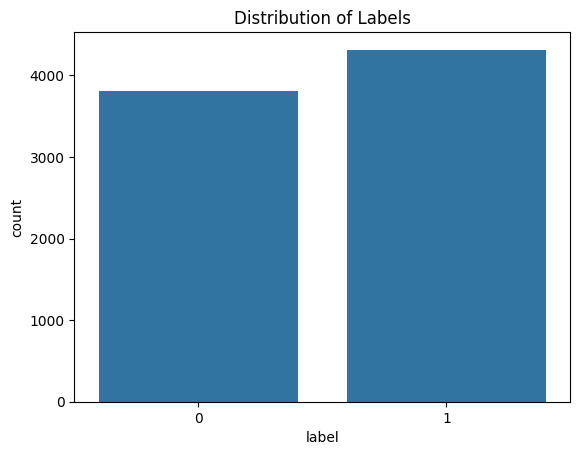

In [ ]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.show()

Graphical Representation of Title and Text Lengths:

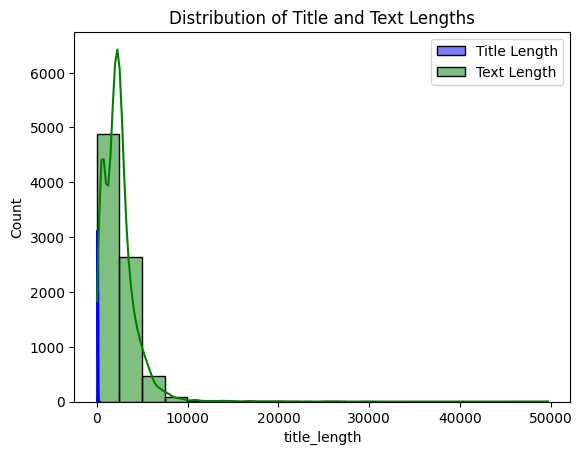

In [ ]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

sns.histplot(df['title_length'], bins=20, kde=True, color='blue', label='Title Length')
sns.histplot(df['text_length'], bins=20, kde=True, color='green', label='Text Length')
plt.legend()
plt.title('Distribution of Title and Text Lengths')
plt.show()

Running a Pairplot operation on our dataset using columns 'label', 'text_length', 'title_length':

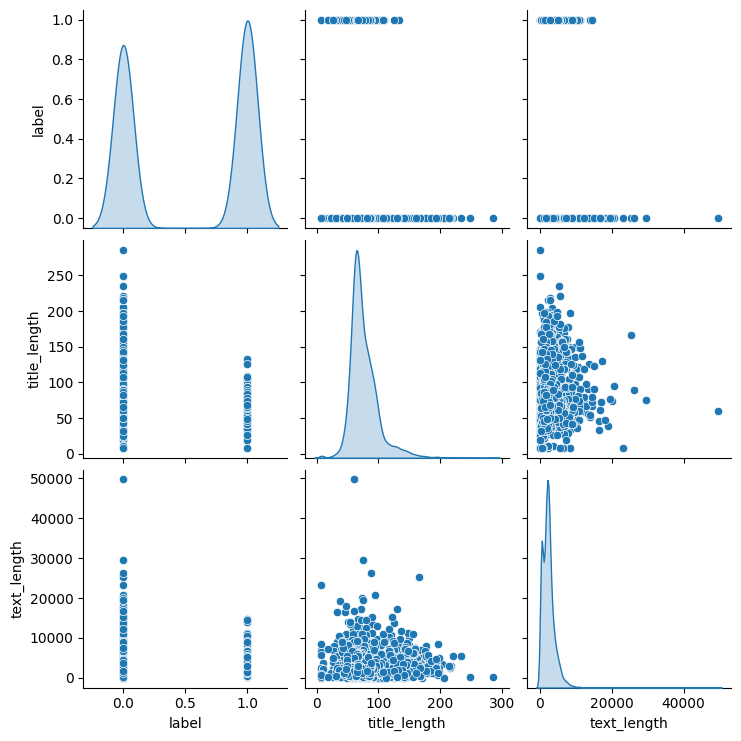

In [ ]:
sns.pairplot(df.drop(['Unnamed: 0', 'text words', 'title words'], axis=1), diag_kind='kde')

### Preprocessing Steps

In [ ]:
# Imports
import string
import nltk
nltk.download('all')
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
# Removing Punctuation
def remove_punc(istr):
  return istr.translate(istr.maketrans('', '', string.punctuation))

cleaned_df = df.copy()
cleaned_df['title'] = cleaned_df['title'].apply(remove_punc)
cleaned_df['text'] = cleaned_df['text'].apply(remove_punc)

In [ ]:
# Removing Stop Words
title = list(cleaned_df['title'])
text = list(cleaned_df['text'])

lemmatizer = WordNetLemmatizer()

corpus_txt = []
corpus_ttl = []
txt_words = []
ttl_words = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    txt_words.append(r)
    r = ' '.join(r)
    corpus_txt.append(r)

for i in range(len(title)):
    r = re.sub('[^a-zA-Z]', ' ', title[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    ttl_words.append(r)
    r = ' '.join(r)
    corpus_ttl.append(r)

    # Assigning corpuses
cleaned_df['corpus_text'] = corpus_txt
cleaned_df['corpus_title'] = corpus_ttl
cleaned_df.head()

,Unnamed: 0,title,text,label,title words,text words,title_length,text_length,corpus_text,corpus_title
0,0,Sanders back in US Senate blasts colonialism i...,WASHINGTON Reuters Democratic US presidential...,1,10,340,64,2172,washington reuters democratic u presidential h...,sander back u senate blast colonialism puerto ...
1,1,Kremlin Syria peoples congress being actively ...,MOSCOW Reuters A proposal to convene a congre...,1,7,92,59,525,moscow reuters proposal convene congress syria...,kremlin syria people congress actively discussed
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,In a baffling fit of rage an Oregon State Poli...,0,15,526,94,2961,baffling fit rage oregon state police officer ...,oregon cop convicted shattering biker collarbo...
3,3,Twitter Erupts With Glee Over CruzSexScandal ...,The last thing any politician running for the ...,0,9,451,62,2788,last thing politician running presidency need ...,twitter erupts glee cruzsexscandal rumor tweet
4,4,MUST WATCH VIDEO Obama Tries To Trash Trump Bu...,This is too good to miss Mr Teleprompter didn ...,0,15,24,83,118,good miss mr teleprompter well went script app...,must watch video obama try trash trump turn ba...


In [ ]:
# Lexical Diversity
ld = []
for words in ttl_words:
  ld.append(len(set(words)))
cleaned_df['title_lexicalDiversity'] = ld

ld = []
for words in txt_words:
  ld.append(len(set(words)))
cleaned_df['text_lexicalDiversity'] = ld

cleaned_df.head()

,Unnamed: 0,title,text,label,title words,text words,title_length,text_length,corpus_text,corpus_title,title_lexicalDiversity,text_lexicalDiversity
0,0,Sanders back in US Senate blasts colonialism i...,WASHINGTON Reuters Democratic US presidential...,1,10,340,64,2172,washington reuters democratic u presidential h...,sander back u senate blast colonialism puerto ...,8,153
1,1,Kremlin Syria peoples congress being actively ...,MOSCOW Reuters A proposal to convene a congre...,1,7,92,59,525,moscow reuters proposal convene congress syria...,kremlin syria people congress actively discussed,6,43
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,In a baffling fit of rage an Oregon State Poli...,0,15,526,94,2961,baffling fit rage oregon state police officer ...,oregon cop convicted shattering biker collarbo...,10,188
3,3,Twitter Erupts With Glee Over CruzSexScandal ...,The last thing any politician running for the ...,0,9,451,62,2788,last thing politician running presidency need ...,twitter erupts glee cruzsexscandal rumor tweet,6,171
4,4,MUST WATCH VIDEO Obama Tries To Trash Trump Bu...,This is too good to miss Mr Teleprompter didn ...,0,15,24,83,118,good miss mr teleprompter well went script app...,must watch video obama try trash trump turn ba...,10,9


In [ ]:
# Number of Sentences
numSent = []
for s in df['text']:
  numSent.append(len(sent_tokenize(s)))
cleaned_df['text_numSentences'] = numSent

numSent = []
for s in df['title']:
  numSent.append(len(sent_tokenize(s)))
cleaned_df['title_numSentences'] = numSent

cleaned_df.head()

,Unnamed: 0,title,text,label,title words,text words,title_length,text_length,corpus_text,corpus_title,title_lexicalDiversity,text_lexicalDiversity,text_numSentences,title_numSentences
0,0,Sanders back in US Senate blasts colonialism i...,WASHINGTON Reuters Democratic US presidential...,1,10,340,64,2172,washington reuters democratic u presidential h...,sander back u senate blast colonialism puerto ...,8,153,8,1
1,1,Kremlin Syria peoples congress being actively ...,MOSCOW Reuters A proposal to convene a congre...,1,7,92,59,525,moscow reuters proposal convene congress syria...,kremlin syria people congress actively discussed,6,43,3,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,In a baffling fit of rage an Oregon State Poli...,0,15,526,94,2961,baffling fit rage oregon state police officer ...,oregon cop convicted shattering biker collarbo...,10,188,20,1
3,3,Twitter Erupts With Glee Over CruzSexScandal ...,The last thing any politician running for the ...,0,9,451,62,2788,last thing politician running presidency need ...,twitter erupts glee cruzsexscandal rumor tweet,6,171,21,1
4,4,MUST WATCH VIDEO Obama Tries To Trash Trump Bu...,This is too good to miss Mr Teleprompter didn ...,0,15,24,83,118,good miss mr teleprompter well went script app...,must watch video obama try trash trump turn ba...,10,9,2,1


In [ ]:
# Average Length of words
cleaned_df['avg_title_word_length'] = df['title'].apply(lambda x: sum(list(map(len, (word for word in x.split()))))/len(list(map(len, (word for word in x.split())))) if len(list(map(len, (word for word in x.split())))) > 0 else 0)
cleaned_df['avg_text_word_length'] = df['text'].apply(lambda x: sum(list(map(len, (word for word in x.split()))))/len(list(map(len, (word for word in x.split())))) if len(list(map(len, (word for word in x.split())))) > 0 else 0)

cleaned_df.head()

,Unnamed: 0,title,text,label,title words,text words,title_length,text_length,corpus_text,corpus_title,title_lexicalDiversity,text_lexicalDiversity,text_numSentences,title_numSentences,avg_title_word_length,avg_text_word_length
0,0,Sanders back in US Senate blasts colonialism i...,WASHINGTON Reuters Democratic US presidential...,1,10,340,64,2172,washington reuters democratic u presidential h...,sander back u senate blast colonialism puerto ...,8,153,8,1,5.500000,5.391176
1,1,Kremlin Syria peoples congress being actively ...,MOSCOW Reuters A proposal to convene a congre...,1,7,92,59,525,moscow reuters proposal convene congress syria...,kremlin syria people congress actively discussed,6,43,3,1,7.571429,4.769231
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,In a baffling fit of rage an Oregon State Poli...,0,15,526,94,2961,baffling fit rage oregon state police officer ...,oregon cop convicted shattering biker collarbo...,10,188,20,1,5.714286,4.748538
3,3,Twitter Erupts With Glee Over CruzSexScandal ...,The last thing any politician running for the ...,0,9,451,62,2788,last thing politician running presidency need ...,twitter erupts glee cruzsexscandal rumor tweet,6,171,21,1,6.750000,5.350114
4,4,MUST WATCH VIDEO Obama Tries To Trash Trump Bu...,This is too good to miss Mr Teleprompter didn ...,0,15,24,83,118,good miss mr teleprompter well went script app...,must watch video obama try trash trump turn ba...,10,9,2,1,4.600000,4.130435


In [ ]:
# Tokenization
title_tokens = df['title'].apply(lambda x: word_tokenize(x))
lemmatizer = WordNetLemmatizer()
lemmas_list = []
for token_list in title_tokens:
  lemmas = [lemmatizer.lemmatize(token) for token in token_list]
  lemmas_list.append(lemmas)

lemmas_list[:5]

[['Sanders',
  'back',
  'in',
  'U.S.',
  'Senate',
  ',',
  'blast',
  "'colonialism",
  "'",
  'in',
  'Puerto',
  'Rico'],
 ['Kremlin',
  ':',
  'Syria',
  'people',
  "'",
  'congress',
  'being',
  "'actively",
  'discussed',
  "'"],
 ['Oregon',
  'Cop',
  'Convicted',
  'Of',
  'Shattering',
  'Biker',
  '’',
  's',
  'Collarbone',
  'With',
  'Kick',
  'Forgot',
  'Dashcam',
  'Was',
  'On',
  '(',
  'VIDEO',
  ')'],
 ['Twitter',
  'Erupts',
  'With',
  'Glee',
  'Over',
  '#',
  'CruzSexScandal',
  'Rumors',
  '(',
  'TWEETS',
  ')'],
 ['MUST',
  'WATCH',
  'VIDEO',
  ':',
  'Obama',
  'Tries',
  'To',
  'Trash',
  'Trump',
  'But',
  'Turns',
  'Into',
  'A',
  'Babbling',
  'Mess',
  '[',
  'Video',
  ']']]

In [ ]:
cleaned_df = cleaned_df.drop('Unnamed: 0', axis=1)

In [ ]:
cleaned_df.head()

,title,text,label,title words,text words,title_length,text_length,corpus_text,corpus_title,title_lexicalDiversity,text_lexicalDiversity,text_numSentences,title_numSentences,avg_title_word_length,avg_text_word_length
0,Sanders back in US Senate blasts colonialism i...,WASHINGTON Reuters Democratic US presidential...,1,10,340,64,2172,washington reuters democratic u presidential h...,sander back u senate blast colonialism puerto ...,8,153,8,1,5.500000,5.391176
1,Kremlin Syria peoples congress being actively ...,MOSCOW Reuters A proposal to convene a congre...,1,7,92,59,525,moscow reuters proposal convene congress syria...,kremlin syria people congress actively discussed,6,43,3,1,7.571429,4.769231
2,Oregon Cop Convicted Of Shattering Biker’s Co...,In a baffling fit of rage an Oregon State Poli...,0,15,526,94,2961,baffling fit rage oregon state police officer ...,oregon cop convicted shattering biker collarbo...,10,188,20,1,5.714286,4.748538
3,Twitter Erupts With Glee Over CruzSexScandal ...,The last thing any politician running for the ...,0,9,451,62,2788,last thing politician running presidency need ...,twitter erupts glee cruzsexscandal rumor tweet,6,171,21,1,6.750000,5.350114
4,MUST WATCH VIDEO Obama Tries To Trash Trump Bu...,This is too good to miss Mr Teleprompter didn ...,0,15,24,83,118,good miss mr teleprompter well went script app...,must watch video obama try trash trump turn ba...,10,9,2,1,4.600000,4.130435


In [ ]:
X = cleaned_df['corpus_text']
y = cleaned_df['label']

# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (5438,)
Testing Data :  (2679,)


In [ ]:
# Feature Extraction
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(5438, 61133)

In [ ]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
# Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['1','0'], columns=['1','0'])
confusion_matrix

,1,0
1,1230,47
0,32,1370


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
preds_train = lr.predict(X_train_cv)

precision_train = precision_score(y_train, preds_train)
recall_train = recall_score(y_train, preds_train)
accuracy_train = accuracy_score(y_train, preds_train)
f1_train = f1_score(y_train, preds_train)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Train Results')
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")
print(' ')
print('Test Results')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Train Results
Precision: 1.00
Recall: 1.00
Accuracy: 1.00
F1 Score: 1.00
 
Test Results
Precision: 0.97
Recall: 0.98
Accuracy: 0.97
F1 Score: 0.97


**Text Analysis:** Using TF-IDF Vectorizer to determine the most imporant words found in `title` and `text`.

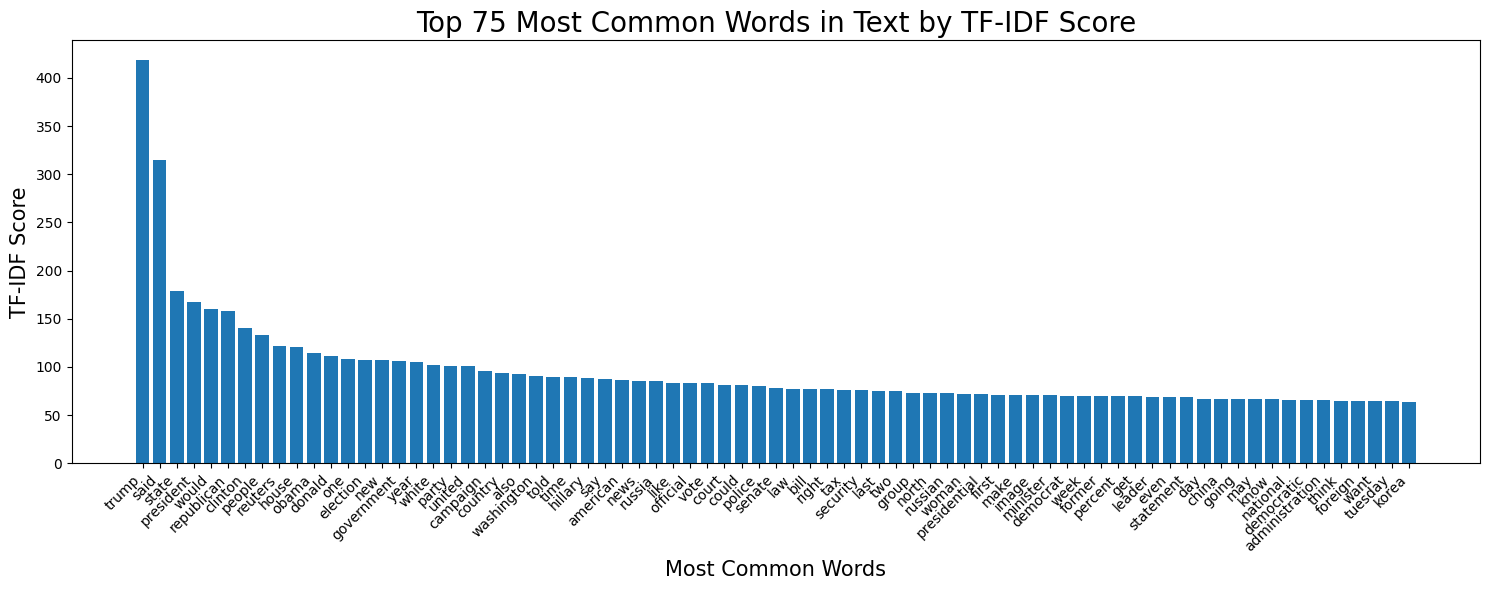

In [ ]:
# Text TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(corpus_txt)
vocab = tfidf.vocabulary_
word_scores = np.asarray(result.sum(axis=0)).flatten()


sorted_words = sorted(vocab.items(), key=lambda item: word_scores[item[1]], reverse=True)

top_words = sorted_words[:75]
top_words_names = [word for word, index in top_words]
top_words_scores = [word_scores[index] for word, index in top_words]

plt.figure(figsize=(15, 6))
plt.bar(top_words_names, top_words_scores)
plt.xlabel('Most Common Words', fontsize=15)
plt.ylabel('TF-IDF Score', fontsize=15)
plt.title('Top 75 Most Common Words in Text by TF-IDF Score', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

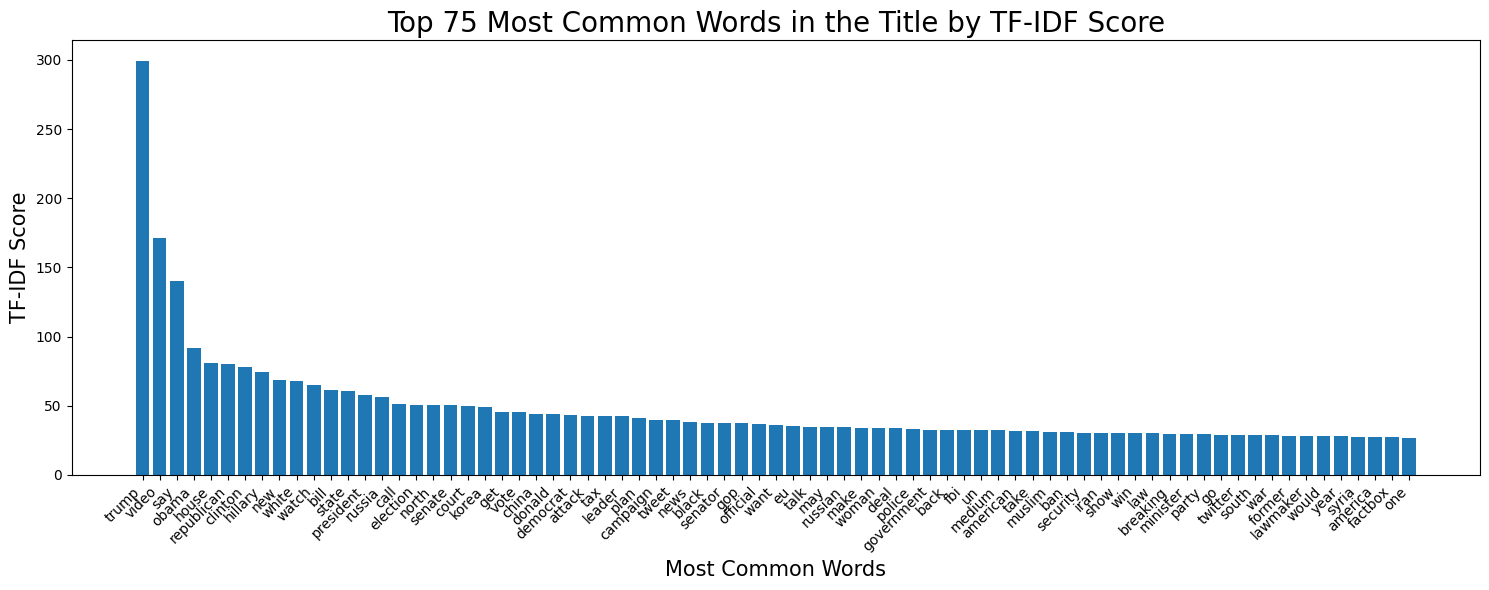

In [ ]:
# Title TF-IDF
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(corpus_ttl)
vocab = tfidf.vocabulary_
word_scores = np.asarray(result.sum(axis=0)).flatten()

sorted_words = sorted(vocab.items(), key=lambda item: word_scores[item[1]], reverse=True)

top_words = sorted_words[:75]
top_words_names = [word for word, index in top_words]
top_words_scores = [word_scores[index] for word, index in top_words]

plt.figure(figsize=(15, 6))
plt.bar(top_words_names, top_words_scores)
plt.xlabel('Most Common Words', fontsize=15)
plt.ylabel('TF-IDF Score', fontsize=15)
plt.title('Top 75 Most Common Words in the Title by TF-IDF Score', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

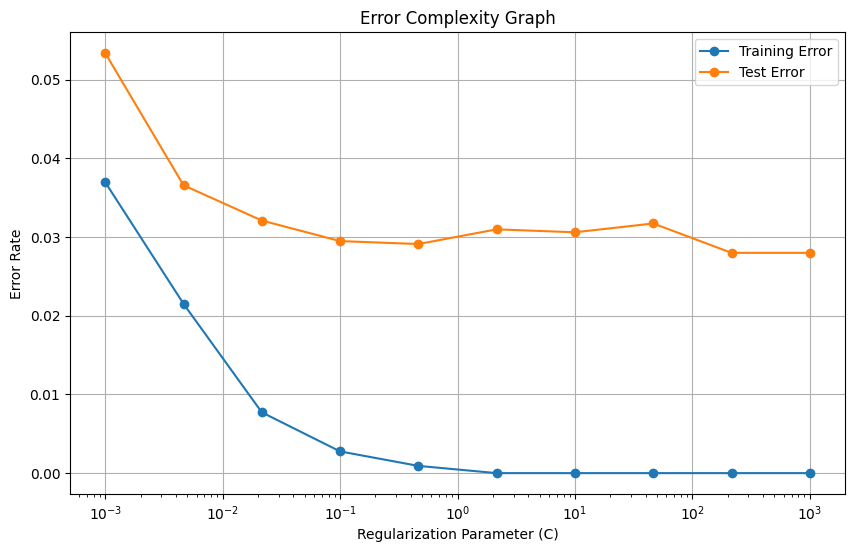

In [ ]:
# Fitting Graph
c_values = np.logspace(-3, 3, 10)

train_errors = []
test_errors = []

for c in c_values:
    lr = LogisticRegression(C=c, max_iter=1000, random_state=123)
    lr.fit(X_train_cv, y_train)

    train_preds = lr.predict(X_train_cv)
    test_preds = lr.predict(X_test_cv)

    train_error = 1 - accuracy_score(y_train, train_preds)
    test_error = 1 - accuracy_score(y_test, test_preds)

    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(c_values, train_errors, label="Training Error", marker='o')
plt.plot(c_values, test_errors, label="Test Error", marker='o')
plt.xscale('log')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Error Rate")
plt.title("Error Complexity Graph")
plt.legend()
plt.grid()
plt.show()

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [ ]:
cleaned_df2 = cleaned_df.copy()
cleaned_df2.head()

,title,text,label,title words,text words,title_length,text_length,corpus_text,corpus_title,title_lexicalDiversity,text_lexicalDiversity,text_numSentences,title_numSentences,avg_title_word_length,avg_text_word_length
0,Sanders back in US Senate blasts colonialism i...,WASHINGTON Reuters Democratic US presidential...,1,10,340,64,2172,washington reuters democratic u presidential h...,sander back u senate blast colonialism puerto ...,8,153,8,1,5.500000,5.391176
1,Kremlin Syria peoples congress being actively ...,MOSCOW Reuters A proposal to convene a congre...,1,7,92,59,525,moscow reuters proposal convene congress syria...,kremlin syria people congress actively discussed,6,43,3,1,7.571429,4.769231
2,Oregon Cop Convicted Of Shattering Biker’s Co...,In a baffling fit of rage an Oregon State Poli...,0,15,526,94,2961,baffling fit rage oregon state police officer ...,oregon cop convicted shattering biker collarbo...,10,188,20,1,5.714286,4.748538
3,Twitter Erupts With Glee Over CruzSexScandal ...,The last thing any politician running for the ...,0,9,451,62,2788,last thing politician running presidency need ...,twitter erupts glee cruzsexscandal rumor tweet,6,171,21,1,6.750000,5.350114
4,MUST WATCH VIDEO Obama Tries To Trash Trump Bu...,This is too good to miss Mr Teleprompter didn ...,0,15,24,83,118,good miss mr teleprompter well went script app...,must watch video obama try trash trump turn ba...,10,9,2,1,4.600000,4.130435


In [43]:
X = cleaned_df2.drop(columns=["label", "corpus_text", "corpus_title", "title", "text"])
y = cleaned_df2["label"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
label
1    3011
0    3011
Name: count, dtype: int64


In [46]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [47]:
y_train_pred = xgb_model.predict(X_train_smote)

y_test_pred = xgb_model.predict(X_test)

In [48]:
print("### Training Set Performance ###")
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
print(f"Accuracy: {train_accuracy:.2f}")
print(classification_report(y_train_smote, y_train_pred))

print("\n### Testing Set Performance ###")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {test_accuracy:.2f}")
print(classification_report(y_test, y_test_pred))

### Training Set Performance ###
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3011
           1       0.94      0.97      0.96      3011

    accuracy                           0.96      6022
   macro avg       0.96      0.96      0.96      6022
weighted avg       0.96      0.96      0.96      6022


### Testing Set Performance ###
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1133
           1       0.90      0.93      0.92      1303

    accuracy                           0.91      2436
   macro avg       0.91      0.91      0.91      2436
weighted avg       0.91      0.91      0.91      2436



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

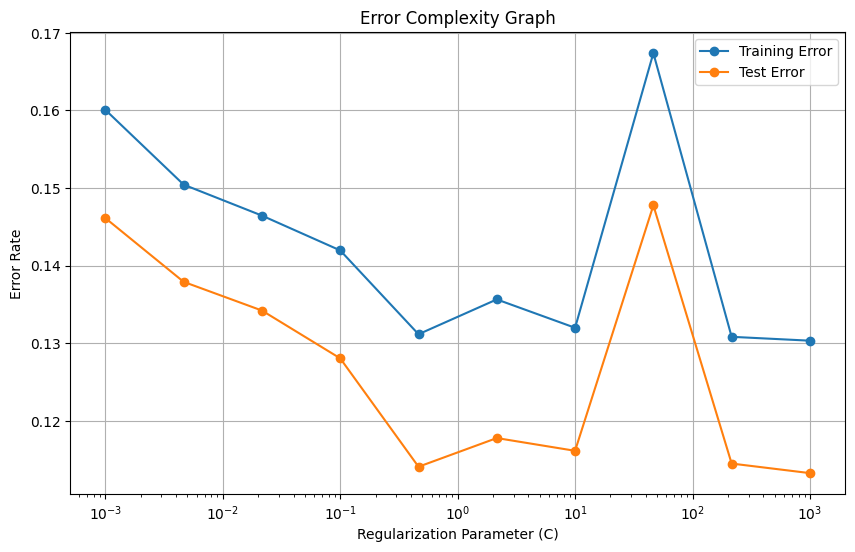

In [ ]:
# Fitting Graph
c_values = np.logspace(-3, 3, 10)

train_errors = []
test_errors = []

for c in c_values:
    lr = LogisticRegression(C=c, max_iter=1000, random_state=123)
    lr.fit(X_train_smote, y_train_smote)

    train_preds = lr.predict(X_train_smote)
    test_preds = lr.predict(X_test)

    train_error = 1 - accuracy_score(y_train_smote, train_preds)
    test_error = 1 - accuracy_score(y_test, test_preds)

    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(10, 6))
plt.plot(c_values, train_errors, label="Training Error", marker='o')
plt.plot(c_values, test_errors, label="Test Error", marker='o')
plt.xscale('log')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Error Rate")
plt.title("Error Complexity Graph")
plt.legend()
plt.grid()
plt.show()